# 原始数据可视化

In [1]:
from sqlalchemy import create_engine
from config import MySQLConfig
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 连接到 MySQL
db = MySQLConfig()
engine_str = f"mysql+pymysql://{db.user}:{db.password}@{db.host}:{db.port}/{db.database}?charset={db.charset}"
engine = create_engine(engine_str)

print("MySQL连接成功")


# 执行 SQL 查询并加载数据
query = """SELECT * FROM DeliverInsight.customer"""
df = pd.read_sql(query, engine)

# 显示数据的前几行
print(df.head())

MySQL连接成功
   客户账号    运单数     业务量     体积    计费重量  重泡标识  主要始发站  主要终点站  开始城市  终点城市  服务类型  \
0     1  344.0  6880.0  27.52  6880.0     1      0     58     1   449     1   
1     2  420.0  8400.0  33.60  8400.0     1      0     54     1   427     1   
2     3   65.0  1300.0   5.20  1300.0     1      0     58     1   449     1   
3     4  489.0  9780.0  39.12  9780.0     1      0     12     1    80     1   
4     5  107.0  2140.0   8.56  2140.0     1      0     19     1   116     1   

   结算方式  收益站      收益 近期合作月份_time 近期合作日期_time  创收站  流失情况  
0     1    0  3199.2  2015-10-01  2015-10-15    1     0  
1     1    0  3738.0  2015-10-01  2015-10-09    1     0  
2     1    0   604.5  2015-10-01  2015-10-12    1     0  
3     1    0  2934.0  2015-10-01  2015-10-09    1     0  
4     1    0  1177.0  2015-10-01  2015-11-03    0     0  


## 数据可视化

### a. 客户收益柱状图

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='客户账号', y='收益', data=df)
plt.title('客户收益')
plt.xlabel('客户账号')
plt.ylabel('收益')
plt.show()

### b. 随时间变化的收益折线图

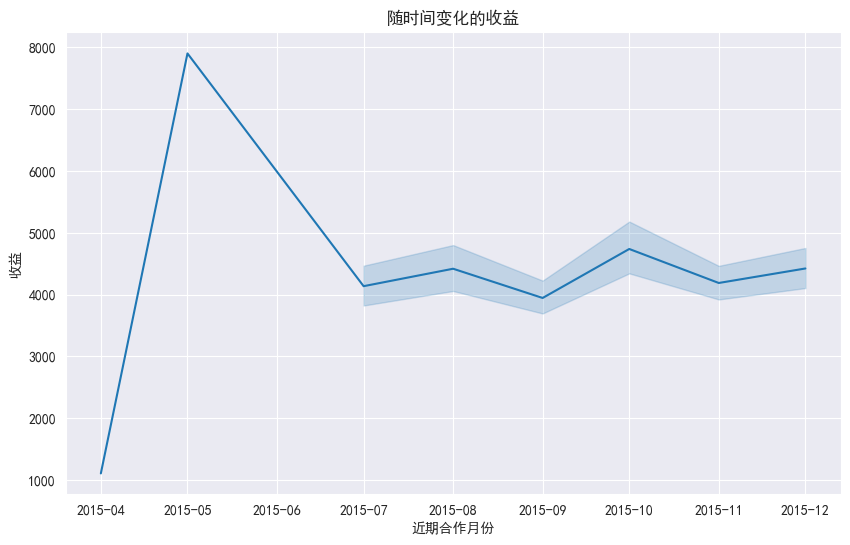

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='近期合作月份_time', y='收益', data=df)
plt.title('随时间变化的收益')
plt.xlabel('近期合作月份')
plt.ylabel('收益')
plt.show()

### c. 运单数分布的直方图

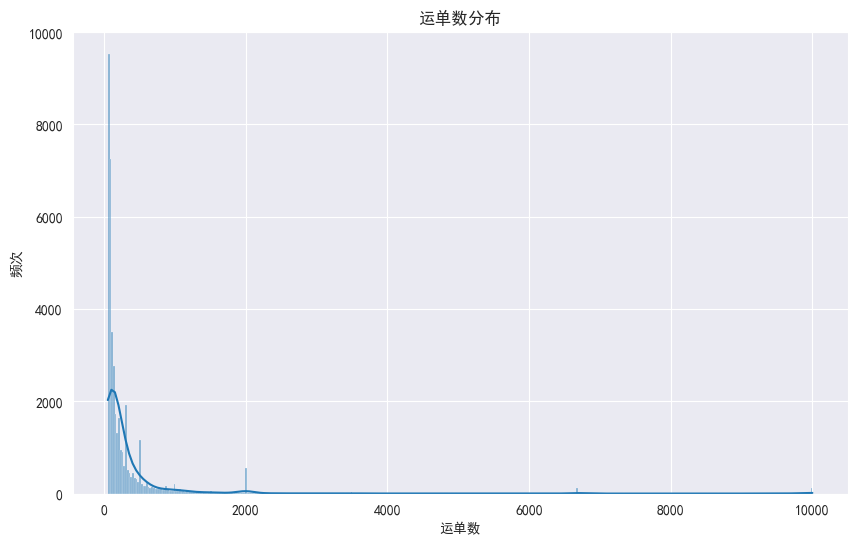

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['运单数'], kde=True)
plt.title('运单数分布')
plt.xlabel('运单数')
plt.ylabel('频次')
plt.show()

### d. 业务量与体积的散点图

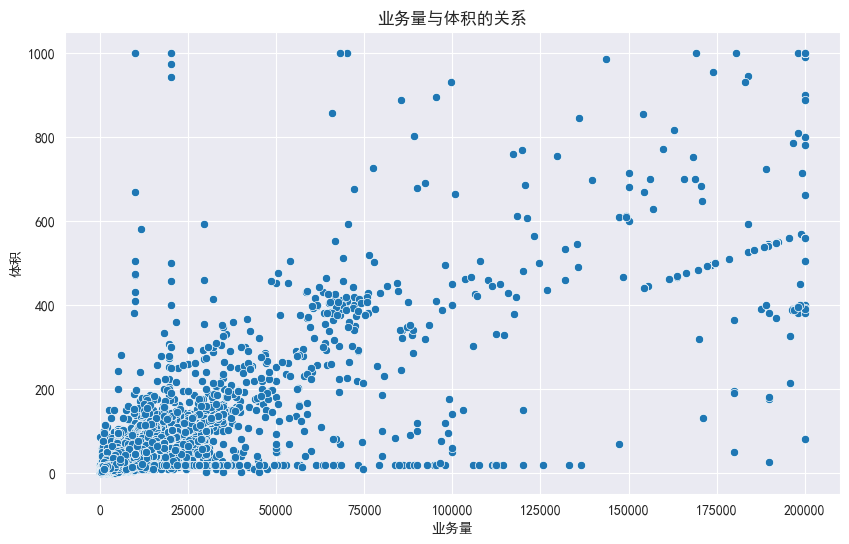

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='业务量', y='体积', data=df)
plt.title('业务量与体积的关系')
plt.xlabel('业务量')
plt.ylabel('体积')
plt.show()

### e. 流失情况与收益的箱线图

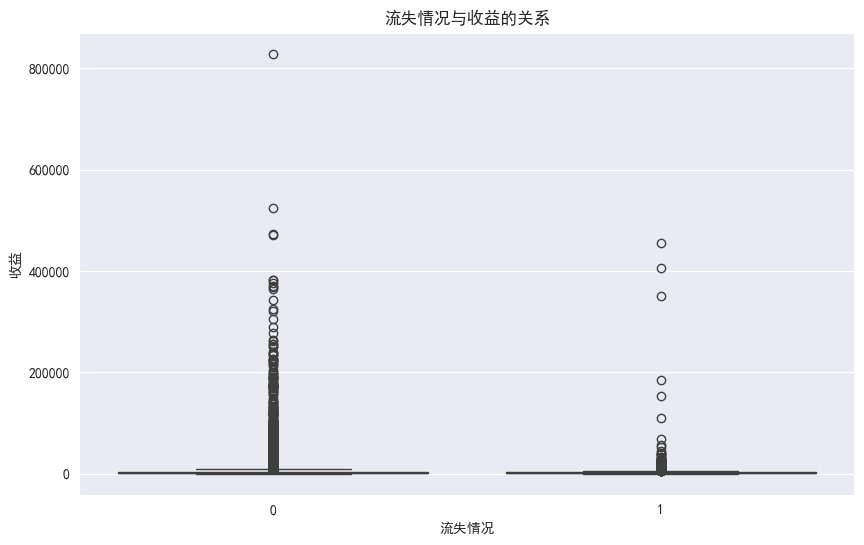

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='收益', data=df)
plt.title('流失情况与收益的关系')
plt.xlabel('流失情况')
plt.ylabel('收益')
plt.show()

### f. 相关性热图

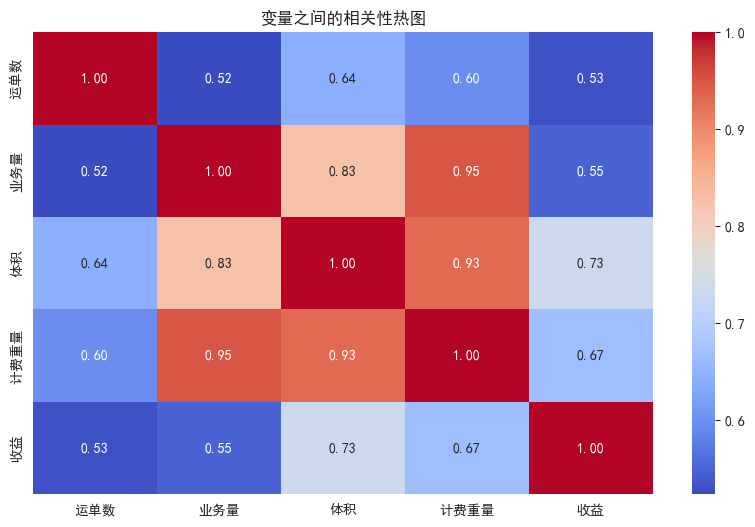

In [11]:
# 选择需要计算相关性的列
corr = df[['运单数', '业务量', '体积', '计费重量', '收益']].corr()

# 绘制相关性热图
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('变量之间的相关性热图')
plt.show()

### g.各个城市的收益分布

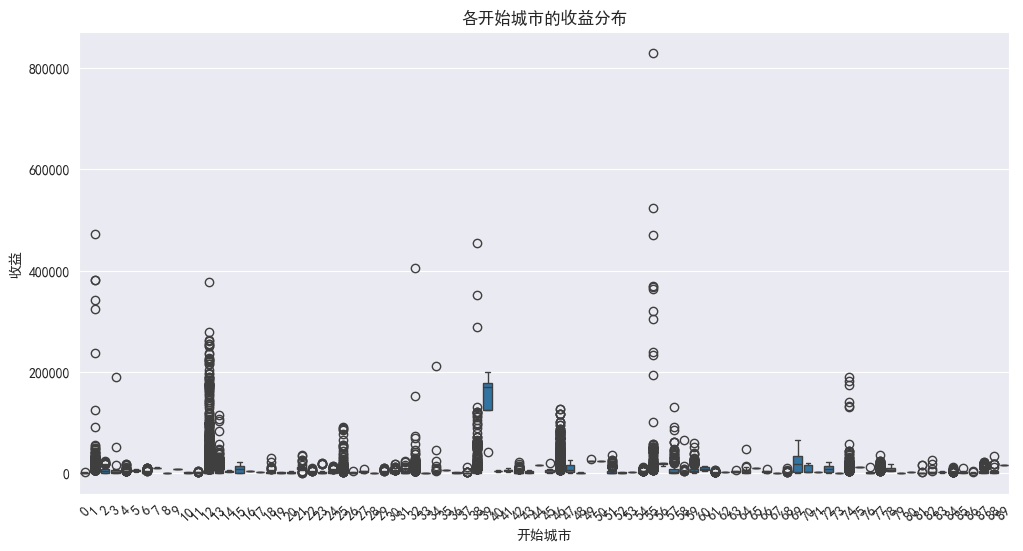

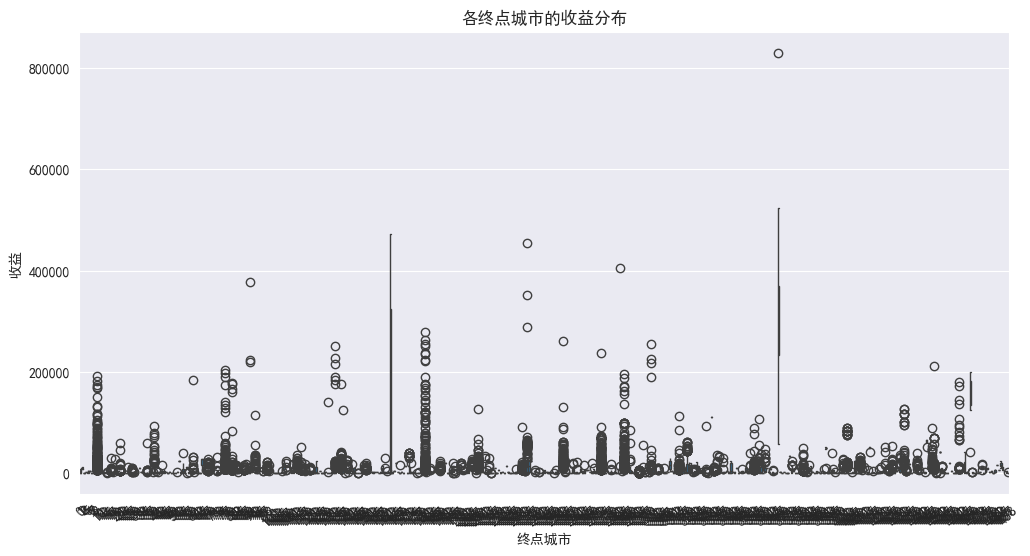

In [14]:
# 按开始城市展示收益分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='开始城市', y='收益', data=df)
plt.title('各开始城市的收益分布')
plt.xlabel('开始城市')
plt.ylabel('收益')
plt.xticks(rotation=45)
plt.show()

# 按终点城市展示收益分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='终点城市', y='收益', data=df)
plt.title('各终点城市的收益分布')
plt.xlabel('终点城市')
plt.ylabel('收益')
plt.xticks(rotation=45)
plt.show()


### h.流失情况与其他变量的关系

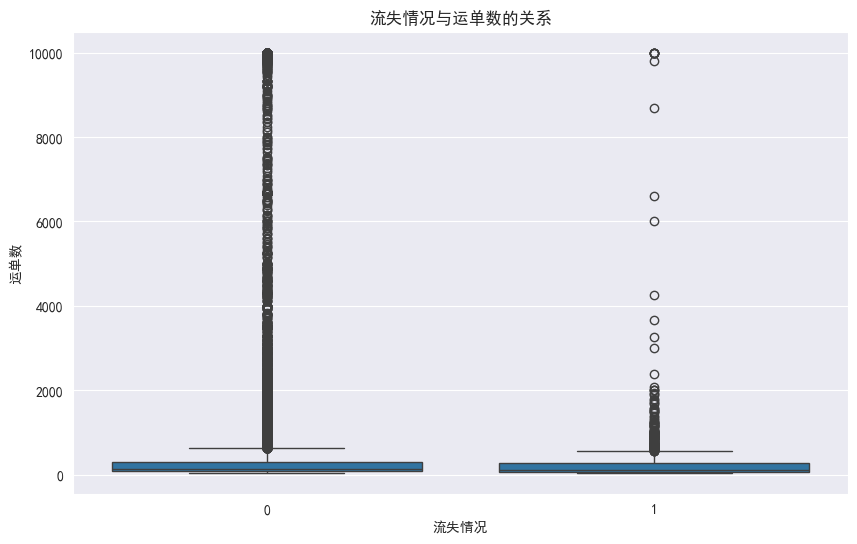

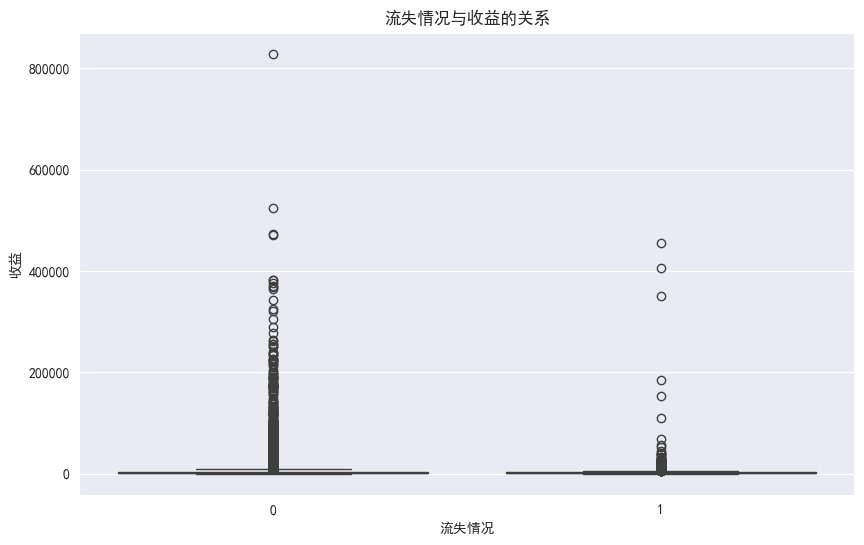

In [15]:
# 流失情况与运单数的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='运单数', data=df)
plt.title('流失情况与运单数的关系')
plt.xlabel('流失情况')
plt.ylabel('运单数')
plt.show()

# 流失情况与收益的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='收益', data=df)
plt.title('流失情况与收益的关系')
plt.xlabel('流失情况')
plt.ylabel('收益')
plt.show()


### i.不同服务类型的分布

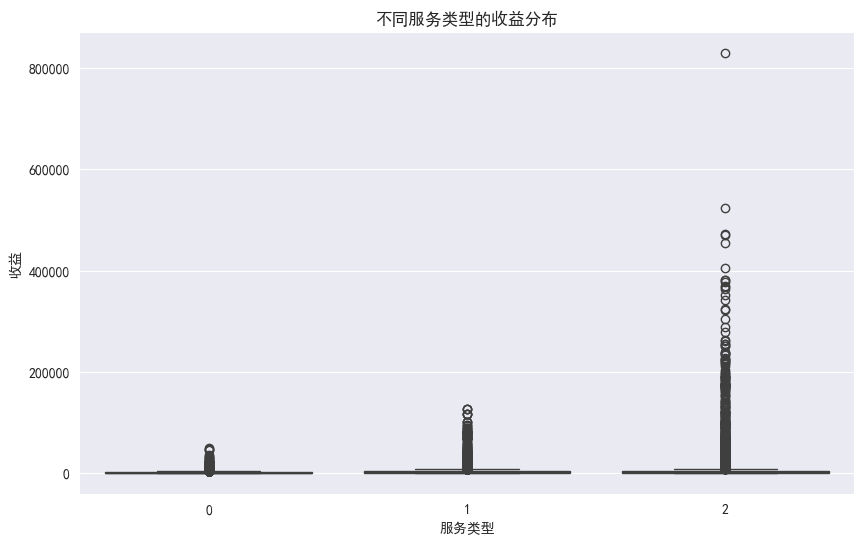

In [16]:
# 不同服务类型的收益分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='服务类型', y='收益', data=df)
plt.title('不同服务类型的收益分布')
plt.xlabel('服务类型')
plt.ylabel('收益')
plt.show()


### 不同结算方式的收益对比

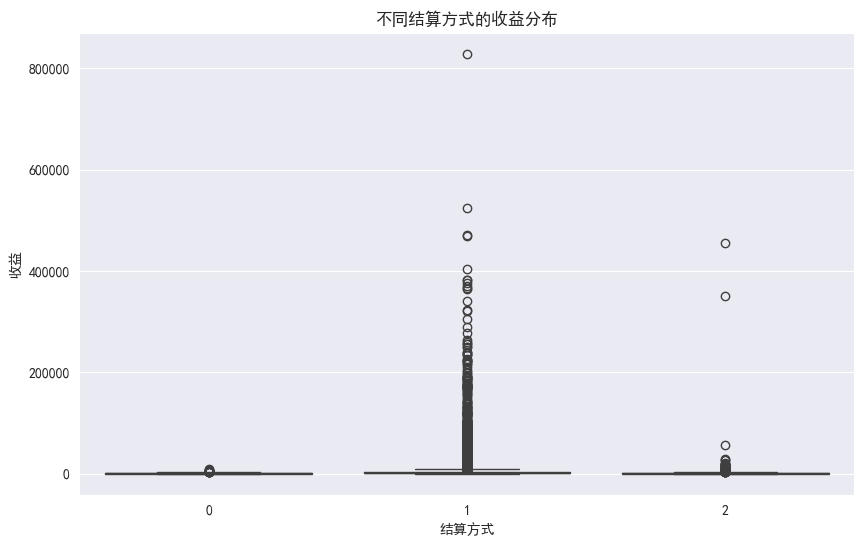

In [17]:
# 按结算方式展示收益分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='结算方式', y='收益', data=df)
plt.title('不同结算方式的收益分布')
plt.xlabel('结算方式')
plt.ylabel('收益')
plt.show()
